# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Akbar Maulana Ibrahim
- **Email:** akbarmlnibrahim@gmail.com
- **ID Dicoding:** akbaarrmaulana

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Adakah hubungan antara musim dengan jumlah penyewaan sepeda
- Pertanyaan 2 : Bagaimana kondisi penyewaan sepeda pada harian dan pada working day
- Pertanyaan 3 : Bagaimana tren penyewaan sepeda bulanan pada tahun 2011 dan 2012

## Import Semua Packages/Library yang Digunakan

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

In [203]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.Collecting docopt==0.6.2



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.3 which is incompatible.
aws-sam-cli 1.53.0 requires typing-extensions==3.10.0.0, but you have typing-extensions 4.8.0 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
ipykernel 6.4.1 requires ipython<8.0,>=7.23.1, but you have ipython 8.12.3 which is incompatible.


  Using cached pure_eval-0.2.2-py3-none-any.whl (11 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=eb88a3c447476d8f7ebb21b1b7551997caa722b0cf0befe75580b4644dd5fe0c
  Stored in directory: c:\users\akbar\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.1.3
    Uninstalling nbformat-5.1.3:
      Successfully uninstalled nbformat-5.1.3
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.20
    Uninstalling prompt-toolkit-3.0.20:
      Successfully uninstalled prompt-toolkit-3.0.20
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uni

## Data Wrangling

### Gathering Data

In [151]:
day = pd.read_csv('data\day.csv',sep=';')
hour = pd.read_csv('data\hour.csv',sep=';')

In [152]:
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06/01/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07/01/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08/01/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09/01/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10/01/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [153]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [154]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [155]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [156]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

### Cleaning Data

**Merubah nama kolom**

In [157]:
day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [158]:
hour.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'cnt': 'count'
}, inplace=True)
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Drop Kolom instant**

In [159]:
day.drop(labels='instant', axis=1, inplace=True)

In [160]:
hour.drop(labels='instant', axis=1, inplace=True)

**Cek jumlah duplikasi pada masing-masing dataframe**

In [161]:
day.duplicated().sum()

0

In [162]:
hour.duplicated().sum()

0

Tidak ada duplikasi data

**Merubah tipe data**

In [163]:
day['date'] = pd.to_datetime(day['date'])

In [164]:
hour['date'] = pd.to_datetime(hour['date'])

In [165]:
type_col = ['season', 'holiday','weekday','workingday','weathersit']

for i in day.columns:
  if i in type_col:
    day[type_col]=day[type_col].astype('category')

for i in day.columns:
  if i in type_col:
    hour[type_col]=hour[type_col].astype('category')

====

In [166]:
def convert_to_month_name(month):
    return calendar.month_abbr[month]

day['month'] = day['month'].apply(convert_to_month_name)

In [167]:
def convert_to_month_name(month):
    return calendar.month_abbr[month]

hour['month'] = hour['month'].apply(convert_to_month_name)

In [168]:
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour['season'] = hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [169]:
day['year'] = day['year'].map({
    0: 2011, 1: 2012
})
hour['year'] = hour['year'].map({
    0: 2011, 1: 2012
})

In [170]:
day['weekday'] = day['weekday'].map({
    0: "Sun", 1: 'Mon', 2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'
})
hour['weekday'] = hour['weekday'].map({
    0: "Sun", 1: 'Mon', 2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'
})

In [171]:
def convert_to_time(hour):
    return datetime.strptime(str(hour), '%H').strftime('%H:%M')

hour['hour'] = hour['hour'].apply(convert_to_time)

In [172]:
day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-02-01,Spring,2011,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-03-01,Spring,2011,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-04-01,Spring,2011,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-05-01,Spring,2011,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [173]:
hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,00:00,0,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,01:00,0,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,02:00,0,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,03:00,0,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,04:00,0,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [174]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day['month'] = pd.Categorical(day['month'], categories=month_order, ordered=True)
hour['month'] = pd.Categorical(hour['month'], categories=month_order, ordered=True)

In [175]:
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
day['weekday'] = pd.Categorical(day['weekday'], categories=day_order, ordered=True)
hour['weekday'] = pd.Categorical(hour['weekday'], categories=day_order, ordered=True)

In [176]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    int64         
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1

In [177]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  int64         
 3   month       17379 non-null  category      
 4   hour        17379 non-null  object        
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(6), dateti

## Exploratory Data Analysis (EDA)

### Explore Descriptive Statistics

In [178]:
day.drop(columns=['year']).describe()

,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [179]:
day.drop(columns=['year','registered','casual']).corr()

,temp,atemp,hum,windspeed,count
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
count,0.627494,0.631066,-0.100659,-0.234545,1.000000


- Jumlah penyewaan sepeda harian memiliki korelasi yang cukup kuat dan positif dengan suhu (yang dinormalisasi)

**Jumlah Penyewa berdasarkan Tahun**

In [180]:
dyear= day.groupby(by='year').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count' : 'sum'
}).reset_index()

In [181]:
dyear

,year,casual,registered,count
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


**Jumlah Penyewaan Tiap Bulan**

In [182]:
dm1 = day.groupby(['year','month']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count' : 'sum'
}).reset_index()
dm1[dm1['year']==2011]
dm1[dm1['year']==2012]

,year,month,casual,registered,count
12,2012,Jan,8969,87775,96744
13,2012,Feb,8721,94416,103137
14,2012,Mar,31618,133257,164875
15,2012,Apr,38456,135768,174224
16,2012,May,44235,151630,195865
17,2012,Jun,43294,159536,202830
18,2012,Jul,41705,161902,203607
19,2012,Aug,43197,171306,214503
20,2012,Sep,43778,174795,218573
21,2012,Oct,34538,164303,198841


In [183]:
dd1 = day.groupby(['year','weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count' : 'sum'
}).reset_index()
dd1[dd1['year']==2011]

,year,weekday,casual,registered,count
0,2011,Sun,59603,117471,177074
1,2011,Mon,31560,148661,180221
2,2011,Tue,23989,156349,180338
3,2011,Wed,20660,148509,169169
4,2011,Thu,22440,152112,174552
5,2011,Fri,29453,152553,182006
6,2011,Sat,59547,120196,179743


**Jumlah Penyewaan berdasarkan musim**

In [184]:
dse= day.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count' : 'sum'
}).reset_index()
dse

,season,casual,registered,count
0,Spring,60622,410726,471348
1,Summer,203522,715067,918589
2,Fall,226091,835038,1061129
3,Winter,129782,711831,841613


**Jumlah Penyewa berdasarkan workingday atau bukan workingday**

In [185]:
dwork= day.groupby(by='workingday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count' : 'sum'
}).reset_index()
dwork

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


## Visualization & Explanatory Analysis

### Pertanyaan 1: Adakah hubungan antara musim dengan jumlah penyewaan sepeda

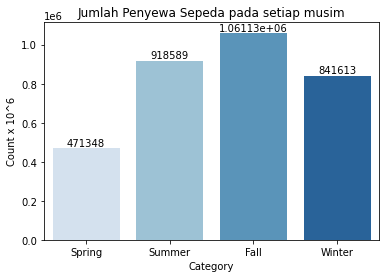

In [186]:
ax = sns.barplot(x = 'season', y = 'count', data = dse, 
            ci = None, palette = 'Blues')
ax.bar_label(ax.containers[0])
 
plt.title('Jumlah Penyewa Sepeda pada setiap musim')
plt.xlabel('Category')
plt.ylabel('Count x 10^6')
plt.show()

In [187]:
cseason = day.groupby(day['season'])['count'].count().reset_index()
cseason

,season,count
0,Spring,181
1,Summer,184
2,Fall,188
3,Winter,178


Dengan jumlah hari yang relatif sama pada setiap musim, ternyata jumlah penyewa sepeda pada musim gugur adalah yang paling banyak, diiuti oleh musim panas, musim dingin dan yang paling sedikit adalah pada musim semi

Text(0, 0.5, 'Count x 10^6')

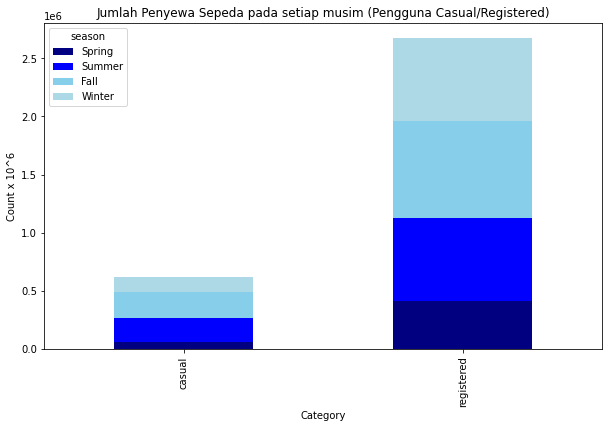

In [188]:
tdse = dse.set_index('season').transpose()
tdse = tdse.iloc[:-1]
ax = tdse.plot(kind='bar', stacked=True, figsize=(10, 6),
              color=['navy', 'blue','skyblue', 'lightblue'])

# Add labels and title
plt.title('Jumlah Penyewa Sepeda pada setiap musim (Pengguna Casual/Registered)')
plt.xlabel('Category')
plt.ylabel('Count x 10^6')

Apabila dibedakan berdasarkan tipe pengguna (casual/registered) jumlah penyewa sepeda kurang lebih sama kondisinya dengan jumlah penyewa sepeda secara total, yakni yang terbanyak adalah pada musim gugur dan musim panas

### Pertanyaan 2: Bagaimana kondisi penyewaan sepeda pada harian dan pada working day

**Penyewaan sepeda harian**

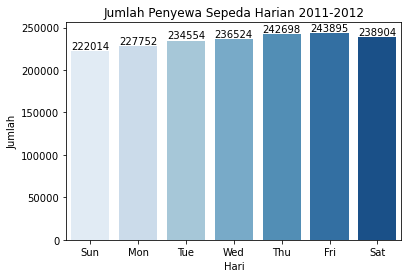

In [189]:
ax = sns.barplot(x = 'weekday', y = 'count', data = dd1, 
            ci = None, palette = 'Blues')
ax.bar_label(ax.containers[0])
 
plt.title('Jumlah Penyewa Sepeda Harian 2011-2012')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.show()

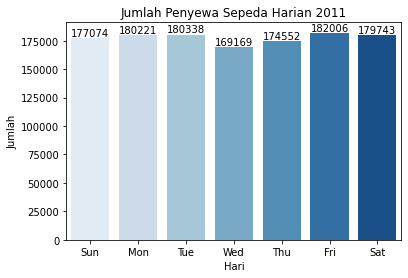

In [190]:
ax = sns.barplot(x = 'weekday', y = 'count', data = dd1[dd1['year']==2011], 
            ci = None, palette = 'Blues')
ax.bar_label(ax.containers[0])
 
plt.title('Jumlah Penyewa Sepeda Harian 2011')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.show()

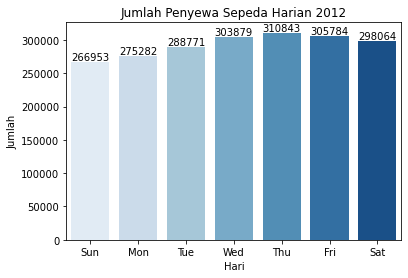

In [191]:
ax = sns.barplot(x = 'weekday', y = 'count', data = dd1[dd1['year']==2012], 
            ci = None, palette = 'Blues')
ax.bar_label(ax.containers[0])
 
plt.title('Jumlah Penyewa Sepeda Harian 2012')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.show()

**Working day**

Text(0, 0.5, 'Count x 10^6')

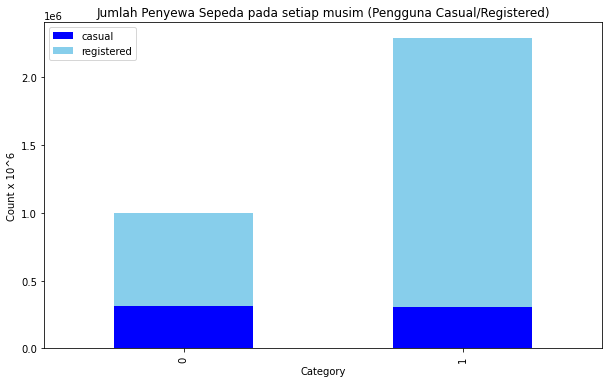

In [193]:
dwork1 = dwork.drop(labels='count',axis=1)
ax = dwork1.plot.bar(stacked=True, figsize=(10, 6),
              color=['blue','skyblue'])
# Add labels and title
plt.title('Jumlah Penyewa Sepeda pada setiap musim (Pengguna Casual/Registered)')
plt.xlabel('Category')
plt.ylabel('Count x 10^6')

## Pertanyaan 3 : Bagaimana tren penyewaan sepeda bulanan pada tahun 2011 dan 2012

Text(0.5, 1.0, 'Count of Bike Sharing in 2011')

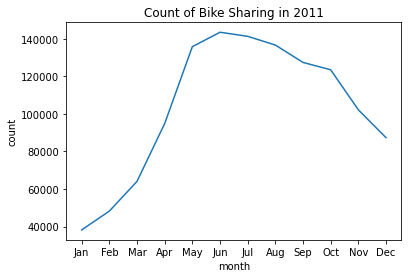

In [195]:
sns.lineplot(x='month', y='count', data=dm1[dm1['year']==2011])
plt.title('Count of Bike Sharing in 2011')

Text(0.5, 1.0, 'Count of Bike Sharing in 2012')

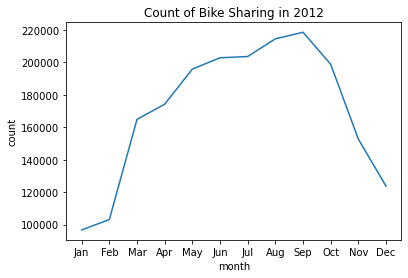

In [196]:
sns.lineplot(x='month', y='count', data=dm1[dm1['year']==2012])
plt.title('Count of Bike Sharing in 2012')

Text(0.5, 1.0, 'Count of Bike Sharing (casual users) in 2011')

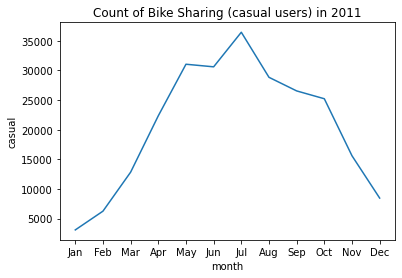

In [199]:
sns.lineplot(x='month', y='casual', data=dm1[dm1['year']==2011])
plt.title('Count of Bike Sharing (casual users) in 2011')

Text(0.5, 1.0, 'Count of Bike Sharing (casual users) in 2012')

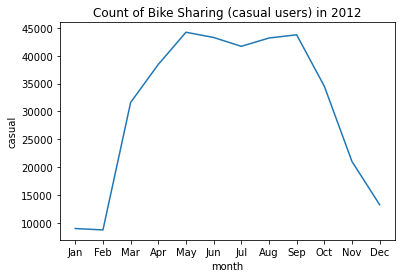

In [200]:
sns.lineplot(x='month', y='casual', data=dm1[dm1['year']==2012])
plt.title('Count of Bike Sharing (casual users) in 2012')

Text(0.5, 1.0, 'Count of Bike Sharing (registered users) in 2011')

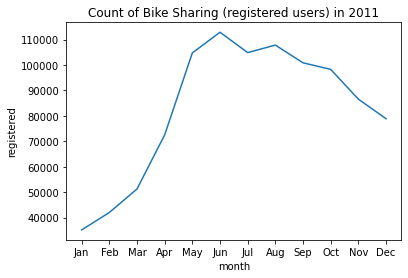

In [201]:
sns.lineplot(x='month', y='registered', data=dm1[dm1['year']==2011])
plt.title('Count of Bike Sharing (registered users) in 2011')

Text(0.5, 1.0, 'Count of Bike Sharing (registered users) in 2012')

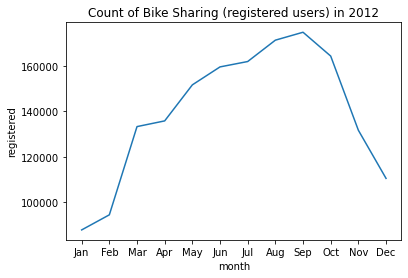

In [202]:
sns.lineplot(x='month', y='registered', data=dm1[dm1['year']==2012])
plt.title('Count of Bike Sharing (registered users) in 2012')

## Conclusion

- Conclution pertanyaan 1 : 
Dengan jumlah hari yang relatif sama pada setiap musim, ternyata jumlah penyewa sepeda pada musim gugur adalah yang paling banyak, diiuti oleh musim panas, musim dingin dan yang paling sedikit adalah pada musim semi
- Conclution pertanyaan 2 : Jumlah penyewa sepeda cukup rata setiap harinya, pada tahun 2011 orang-orang cenderung lebih sedikit yang menyewa sepeda pada hari rabu dan kamis, tapi pada tahun 2012 malah sebaliknya.
- Conclution pertanyaan 3 : Tren bulanan penyewaan sepeda nampak mulai naik sekitar bulan maret-april, kemudian turun pada kisaran bulan september-oktober